# Primer Pre-Entrega del curso Data Science 3 NLP

In [54]:
#Importamos Librerías necesarias

import nltk
import spacy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import nltk
from collections import Counter
from nltk.util import ngrams

# Descargar recursos necesarios de nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [55]:
#Cargamos Modelo

nlp = spacy.load("en_core_web_sm")
print("Modelo cargado correctamente")

Modelo cargado correctamente


In [56]:
# Cargar dataset
df = pd.read_csv('https://raw.githubusercontent.com/nacho1907/Bases/refs/heads/main/fake_or_real_news.csv')
df = df.rename(columns={"text": "texto", "label": "sentimiento"})
df

,Unnamed: 0,title,texto,sentimiento
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
# Contar cuantas noticias reales y fakes hay en el dataset
# Està balanceado? Còmo lo arreglarìas sino?

sentimiento
REAL    3171
FAKE    3164
Name: count, dtype: int64


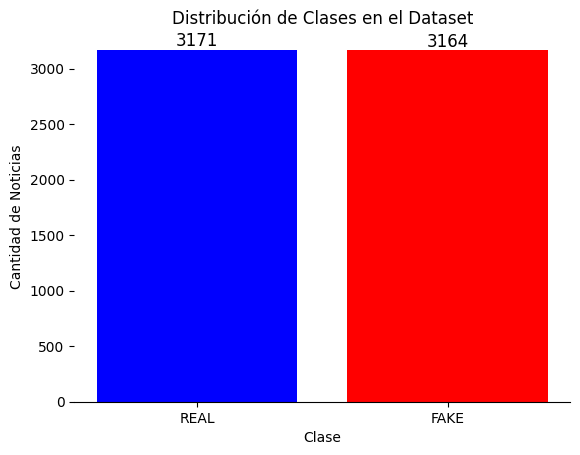

In [57]:
#Contamos cuantas noticias FAKE y REAL hay

conteo_clases = df["sentimiento"].value_counts()
print(conteo_clases)

#Grafico

fig, ax = plt.subplots()
bars = ax.bar(conteo_clases.index, conteo_clases.values, color=["blue", "red"])

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

ax.set_xlabel("Clase")
ax.set_ylabel("Cantidad de Noticias")
ax.set_title("Distribución de Clases en el Dataset")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()

#### Vemos que la cantidad de noticias REAL y FAKE son bastante similares, por lo que podríamos decir que sí, se encuentra bastante balanceado. No tendríamos que aplicar ninguna técnica de balanceo como 'Oversampling' (reduce a la clase mayoritaria) o 'Oversampling' (aumenta a la clase minoritaria)

In [28]:
# Dimensiona el dataset
# En tèrmino de variable que diferencias encuentras con los que usabas en Machine Learning?

In [58]:
# Dimensiones del dataset

print(f"Dimensiones del dataset: {df.shape}")  # (filas, columnas)

# Información general del dataset
print(df.info())


Dimensiones del dataset: (6335, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   6335 non-null   int64 
 1   title        6335 non-null   object
 2   texto        6335 non-null   object
 3   sentimiento  6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


#### Las dimensiones del dataset son 6335 filas y solo 4 columnas. Una de las principales diferencias respecto a las variables es que son datos no estructurados. Todo se encuentra en formato texto y casi no tenemos categorías. Tampoco tenemos números, que es lo que comunmente usaríamos en un modelado tradicional en Machine Learning.

In [59]:
# Corta a un nùmero reducido de noticias para facilitar el procesamiento
# Las clases quedaron balanceadas?

Nuevo tamaño del dataset: (1000, 4)
sentimiento
REAL    513
FAKE    487
Name: count, dtype: int64


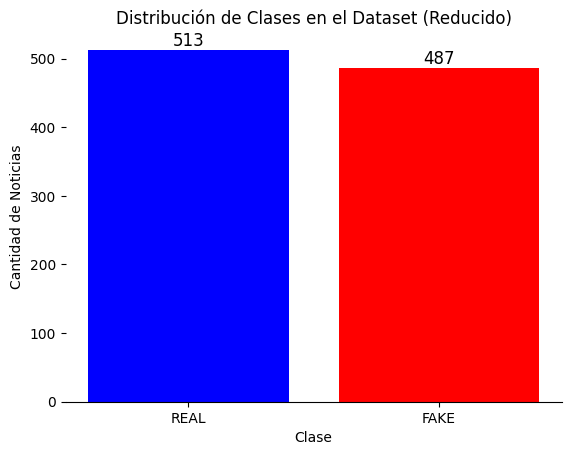

In [60]:
# Reducimos el nro de noticias para facilitar el procesamiento

df_reducido = df.sample(n=1000, random_state=42)  # Seleccionar 1000 noticias aleatorias
print("Nuevo tamaño del dataset:", df_reducido.shape)

# Chequeamos si luego del corte las noticias siguen balanceadas

conteo_reducido = df_reducido["sentimiento"].value_counts()
print(conteo_reducido)

# Grafico

fig, ax = plt.subplots()
bars = ax.bar(conteo_reducido.index, conteo_reducido.values, color=["blue", "red"])

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

ax.set_xlabel("Clase")
ax.set_ylabel("Cantidad de Noticias")
ax.set_title("Distribución de Clases en el Dataset (Reducido)")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()

#### Vemos que incluso luego de un corte significativo (a 1000 filas), el dataset continua balanceado. No obstante, vemos un leve aumento en el % de noticias REAl respecto al primer testeo de balanceo.

In [33]:
# Ajustar etiquetas de sentimiento (0 = fake, 1 = real)

In [61]:
# Ajustamos las etiquetas (0 = fake, 1 = real)
df["sentimiento"] = df["sentimiento"].map({"FAKE": 0, "REAL": 1})

In [62]:
def preprocesar_texto(texto):
    """Tokeniza, elimina stopwords, lematiza y elimina caracteres especiales."""
    doc = nlp(str(texto).lower())  # Convertir a minúsculas y procesar con spaCy
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stopwords.words('english')]
    return " ".join(tokens)

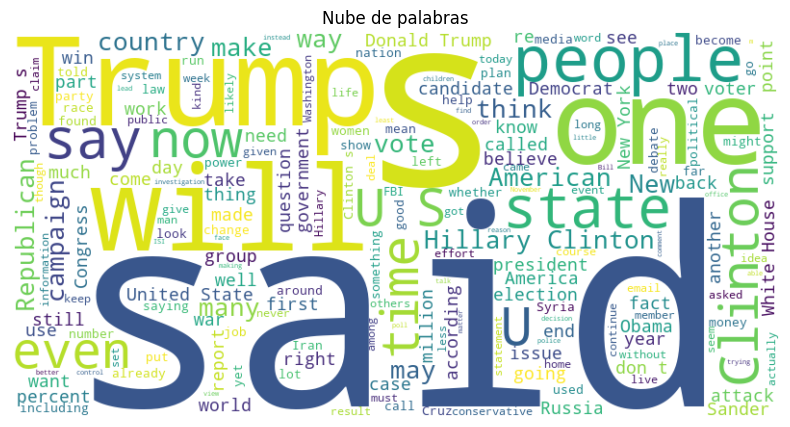

In [63]:
# Aplicar preprocesamiento


# Visualizar nube de palabras completando la secuencia de creaciòn
text_combined = " ".join(df['texto'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras")
plt.show()

Unigramas más comunes:
  N-gram  Frecuencia
0    the      291032
1     to      139881
2     of      129859
3    and      120142
4     in       98737
5   that       72595
6     is       54435
7    for       46478
8     on       40857
9     it       39597


C:\Users\chris\AppData\Local\Temp\ipykernel_12620\2833558175.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='N-gram', data=ngram_df, palette='viridis')


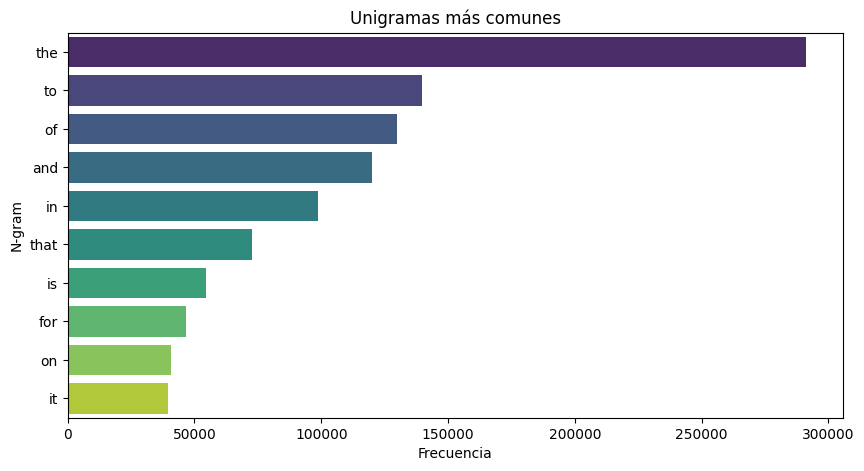


Bigramas más comunes:
     N-gram  Frecuencia
0    of the       30867
1    in the       23918
2    to the       13396
3    on the       10184
4   for the        8494
5   and the        8228
6  that the        7959
7     to be        7687
8    at the        6851
9  with the        5875


C:\Users\chris\AppData\Local\Temp\ipykernel_12620\2833558175.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='N-gram', data=ngram_df, palette='viridis')


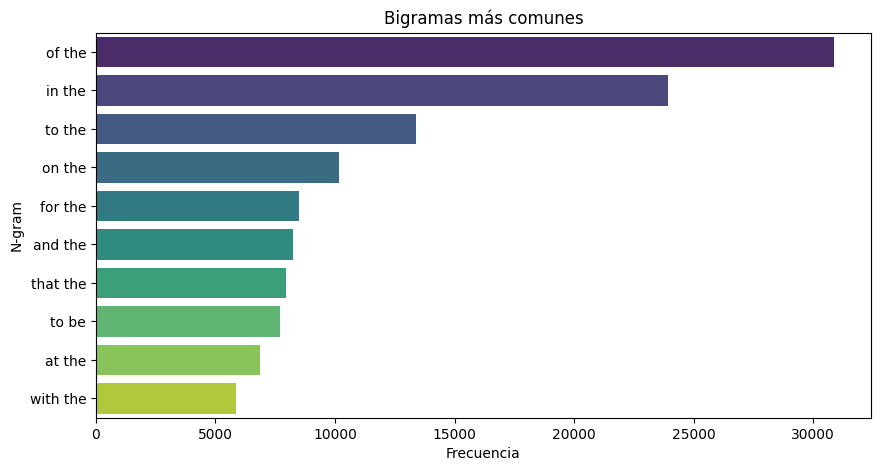


Trigramas más comunes:
               N-gram  Frecuencia
0   the united states        2885
1          one of the        1781
2     the white house        1637
3  secretary of state        1184
4          as well as        1039
5    according to the         956
6       the fact that         812
7         part of the         761
8          out of the         736
9          the end of         727


C:\Users\chris\AppData\Local\Temp\ipykernel_12620\2833558175.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='N-gram', data=ngram_df, palette='viridis')


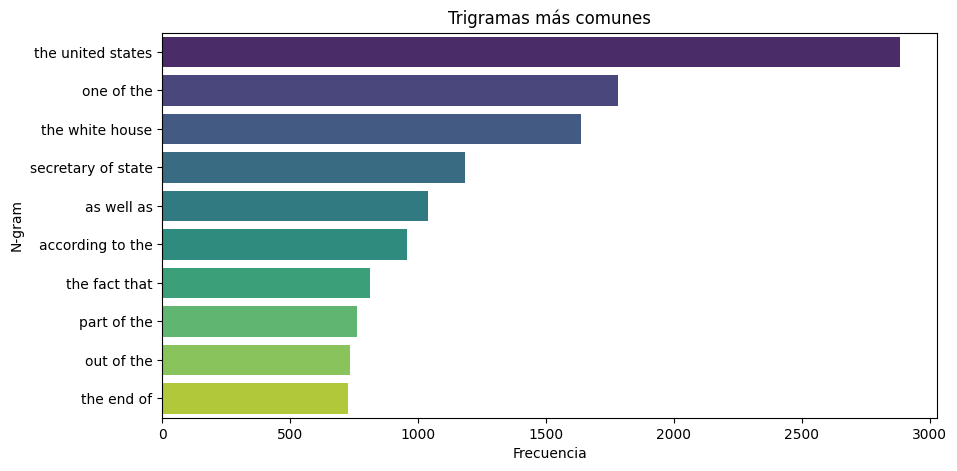


Cuatrigramas más comunes:
                  N-gram  Frecuencia
0   in the united states         593
1   of the united states         592
2     the new york times         473
3        one of the most         352
4  the united states and         347
5         the end of the         344
6       at the same time         328
7        the rest of the         323
8       when it comes to         319
9         we re going to         309


C:\Users\chris\AppData\Local\Temp\ipykernel_12620\2833558175.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='N-gram', data=ngram_df, palette='viridis')


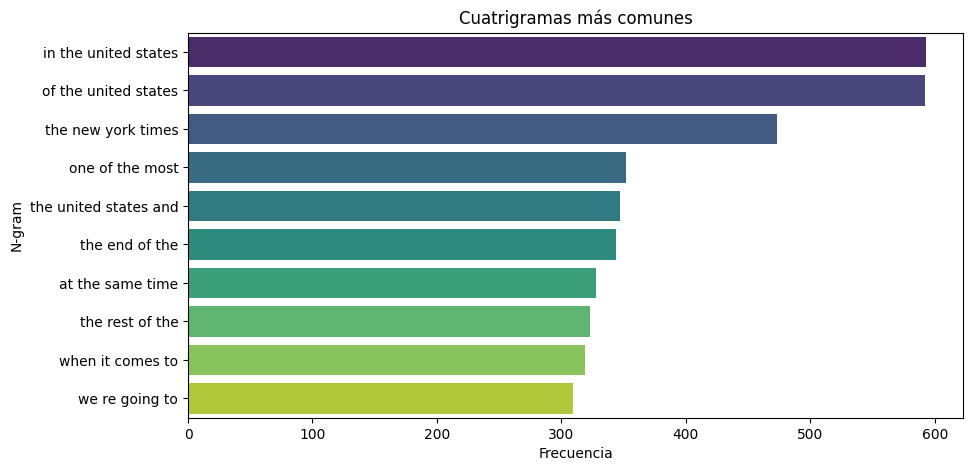

In [67]:
# Análisis de n-grams, adicionar bigramas, trigramas y cuatrigramas. Plotearlos.
def get_top_ngrams(corpus, n, top_k=10):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(corpus)
    ngram_counts = X.sum(axis=0).A1
    ngram_features = vectorizer.get_feature_names_out()
    ngram_freq = list(zip(ngram_features, ngram_counts))
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:top_k]
    return pd.DataFrame(ngram_freq, columns=['N-gram', 'Frecuencia'])

def plot_ngrams(ngram_df, title):
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frecuencia', y='N-gram', data=ngram_df, palette='viridis')
    plt.title(title)
    plt.xlabel("Frecuencia")
    plt.ylabel("N-gram")
    plt.show()

unigrams = get_top_ngrams(df['texto'], 1)
bigrams = get_top_ngrams(df['texto'], 2)
trigrams = get_top_ngrams(df['texto'], 3)
quadgrams = get_top_ngrams(df['texto'], 4)

print("Unigramas más comunes:")
print(unigrams)
plot_ngrams(unigrams, "Unigramas más comunes")

print("\nBigramas más comunes:")
print(bigrams)
plot_ngrams(bigrams, "Bigramas más comunes")

print("\nTrigramas más comunes:")
print(trigrams)
plot_ngrams(trigrams, "Trigramas más comunes")

print("\nCuatrigramas más comunes:")
print(quadgrams)
plot_ngrams(quadgrams, "Cuatrigramas más comunes")

In [ ]:
# Separar datos en entrenamiento y prueba


In [70]:
#Separamos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    df_reducido["texto"], df_reducido["sentimiento"], test_size=0.2, random_state=42, stratify=df_reducido["sentimiento"]
)

print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))



Tamaño del conjunto de entrenamiento: 800
Tamaño del conjunto de prueba: 200


In [74]:
# Pipeline de vectorización y modelo
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

In [75]:
# Entrenar modelo
pipeline.fit(X_train, y_train)

# Predicciones
y_pred = pipeline.predict(X_test)

In [76]:
# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.68
              precision    recall  f1-score   support

        FAKE       1.00      0.34      0.51        97
        REAL       0.62      1.00      0.76       103

    accuracy                           0.68       200
   macro avg       0.81      0.67      0.64       200
weighted avg       0.80      0.68      0.64       200



In [77]:
##DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df =0.9)
## DataFlair - fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [78]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [79]:
y_pred2=pac.predict(tfidf_test)

In [80]:
# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Accuracy: 0.93
              precision    recall  f1-score   support

        FAKE       0.91      0.95      0.93        97
        REAL       0.95      0.91      0.93       103

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



### Breve conclusión:

#### El modelo PassiveAggressiveClassifier logró una precisión del 93%, superando ampliamente al modelo Naïve Bayes (68%). Esto indica que es más efectivo para detectar noticias falsas, gracias a su capacidad para manejar datos desbalanceados y mejorar la clasificación de textos.